In [1]:
from pathlib import Path # Libabry for managing directories and file systems in python
import pandas as pd # dataframe managment
import scipy.stats as sc 
import numpy as np # support for large, multi-dimensional arrays/matrices, and collection of high-level mathematical functions
import matplotlib.pyplot as plt #Library for Data Visualization
from matplotlib.figure import Figure

import seaborn as sns # Better Library for Data Viz

In [2]:
# Import Dataset and create Dataframe
filepath = Path("user_behavior_dataset.csv")

df = pd.read_csv(filepath)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
# Data Cleaning
# Deletes column in place, for this data set deleted 'User Behavior Class' column
del df['User Behavior Class']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [4]:
# Extract seperate DF for Number of apps installed, age and gender
genderappdf = df[["Number of Apps Installed", "Age", "Gender"]]
genderappdf


,Number of Apps Installed,Age,Gender
0,67,40,Male
1,42,47,Female
2,32,42,Male
3,56,20,Male
4,58,31,Female
...,...,...,...
695,26,22,Male
696,68,59,Male
697,22,50,Female
698,13,44,Male


In [5]:
# T test and p value
# Separate the groups
group_a = genderappdf[genderappdf["Gender"] == "Male"]["Number of Apps Installed"]
group_b = genderappdf[genderappdf["Gender"] == "Female"]["Number of Apps Installed"]

# Perform independent t-test
t_stat, p_value = sc.ttest_ind(group_a, group_b, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)
 
    # Convert p value to percentage
p_value_percentage = p_value * 100
print("p-value (percentage): {:.2f}%".format(p_value_percentage))

t-statistic: 0.4299643757641013
p-value: 0.667354455172253
p-value (percentage): 66.74%


Text(0.5, 1.0, 'Number of Apps Installed by Age and Gender')

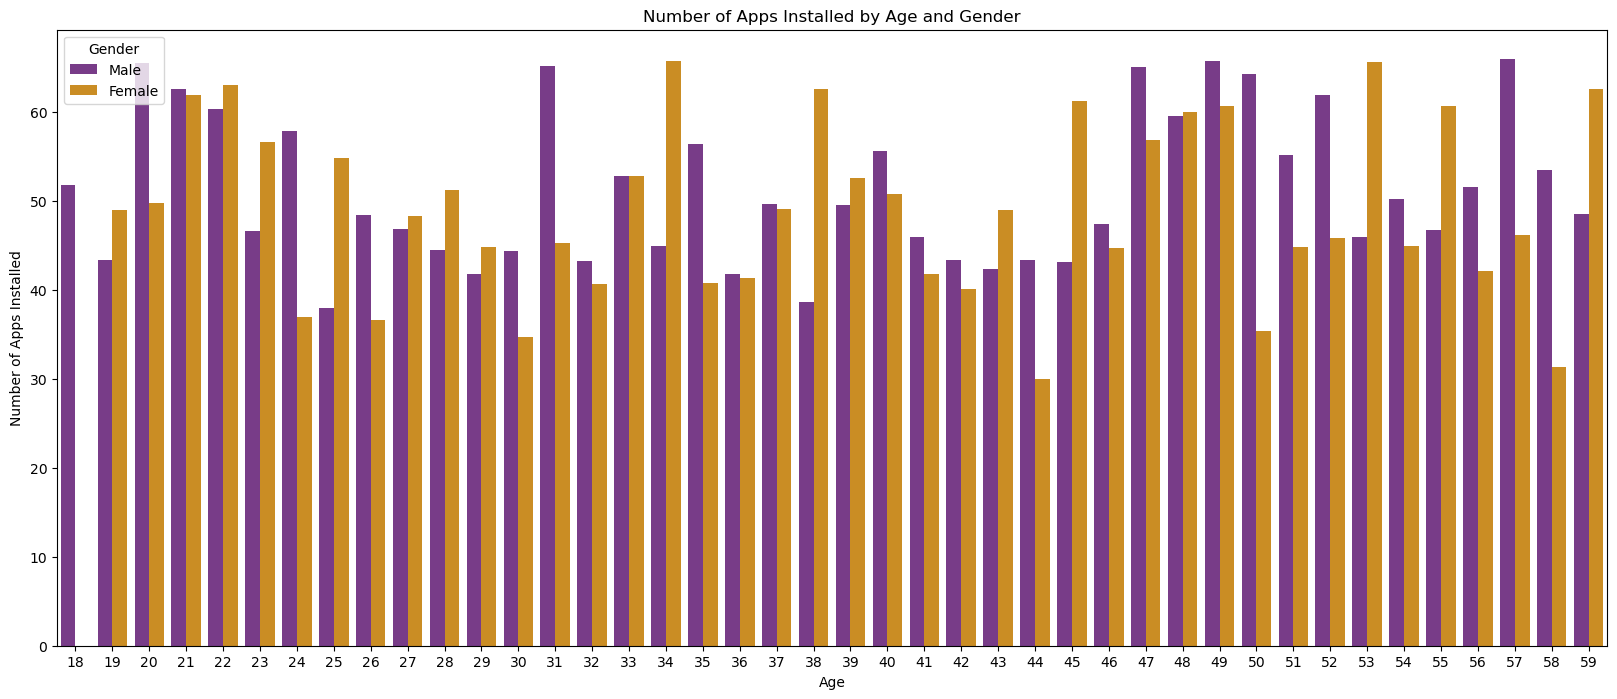

In [6]:
# Nested barplot of Number of Apps Installed by age and gender
plt.figure(figsize= (20, 8))

sns.barplot(data=genderappdf,x="Age", y="Number of Apps Installed", hue="Gender", palette= "CMRmap", errorbar= None)
plt.title("Number of Apps Installed by Age and Gender")
#g.set_axis_labels("", "Number of installed Apps")
#g.legend.set_title("Gender")

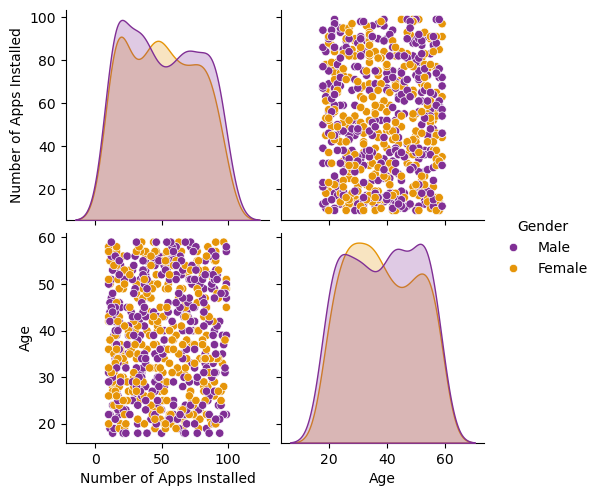

In [7]:
# pairplot with hue gender Histogram
sns.pairplot(genderappdf, hue="Gender", kind="scatter", palette= "CMRmap")
# to show
plt.show()

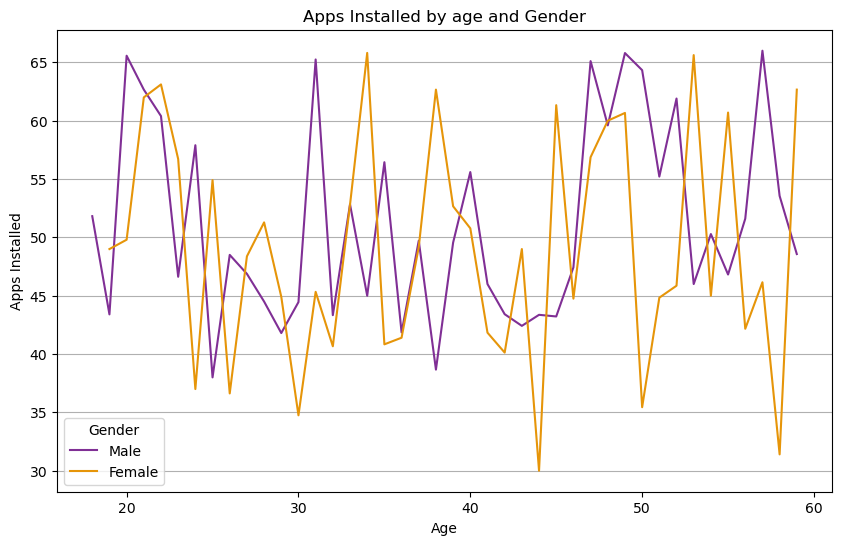

In [8]:
# line Chart
plt.figure(figsize= (10, 6))
sns.lineplot(x= "Age", y= "Number of Apps Installed", hue = "Gender", data = genderappdf, palette= "CMRmap", errorbar = None)

#genderappdf.set_index('Age', inplace=True

#genderappdf.plot(kind='line')
plt.title('Apps Installed by age and Gender')
plt.xlabel('Age')
plt.ylabel('Apps Installed')
plt.grid(True, axis='y')

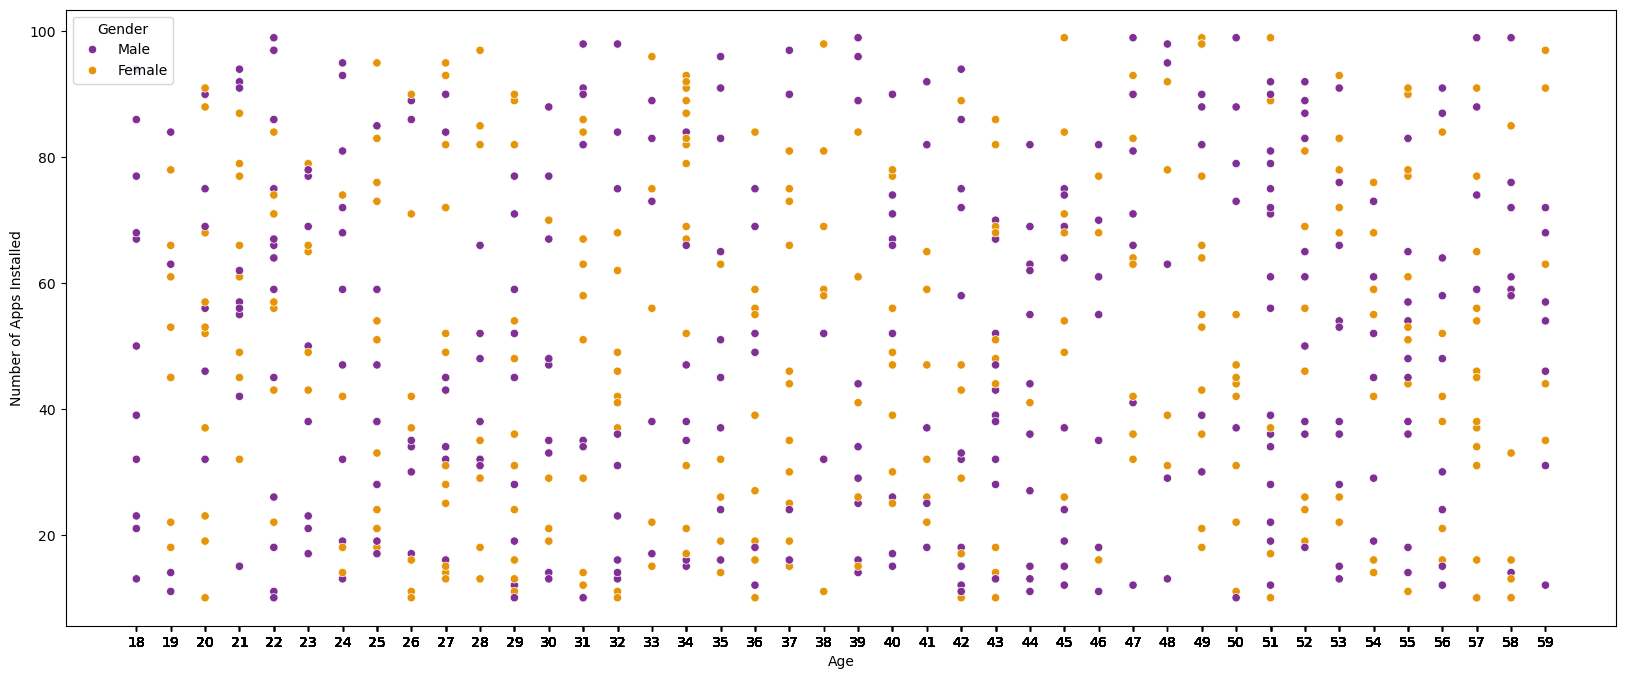

In [9]:
# Scatter plot
# Maybe
plt.figure(figsize=(20, 8)) #Changes the size of the box
sns.scatterplot(data= genderappdf, x="Age", y="Number of Apps Installed" , hue="Gender", palette= "CMRmap") 
plt.xticks(genderappdf["Age"])

# Show the plot
plt.show()

In [10]:
# extract number of apps by age

ageapp = df[["Number of Apps Installed", "Age"]]
ageapp = ageapp.sort_values(by = "Number of Apps Installed", ascending=False)
ageapp.info()
ageapp

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 80 to 637
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Number of Apps Installed  700 non-null    int64
 1   Age                       700 non-null    int64
dtypes: int64(2)
memory usage: 16.4 KB


,Number of Apps Installed,Age
80,99,51
335,99,45
504,99,47
252,99,22
378,99,57
...,...,...
289,10,50
292,10,36
527,10,57
464,10,26


In [11]:
std_dev = ageapp['Number of Apps Installed'].std()
std_dev

26.94332414764512

In [12]:
# R value of Apps installed vs Age
r_value2 = ageapp["Age"].corr(ageapp["Number of Apps Installed"])
r_value2

0.00403404171257536

In [13]:
# Convert R value to percentage

r_value_percentage2 = r_value2 * 100
print("r-value (percentage): {:.2f}%".format(r_value_percentage2))

r-value (percentage): 0.40%


In [14]:
#seperate apps installed by gender Male
apps_male = genderappdf[(genderappdf["Gender"] == "Male")]

# Sorted in Descending
apps_male = apps_male.sort_values(by = "Number of Apps Installed", ascending=False)
apps_male.info()
apps_male

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 381 to 263
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Number of Apps Installed  364 non-null    int64 
 1   Age                       364 non-null    int64 
 2   Gender                    364 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.4+ KB


,Number of Apps Installed,Age,Gender
381,99,39,Male
504,99,47,Male
434,99,58,Male
378,99,57,Male
125,99,50,Male
...,...,...,...
167,10,58,Male
213,10,22,Male
563,10,31,Male
289,10,50,Male


In [15]:
# Average number of apps installed by Males
meanappmale = apps_male["Number of Apps Installed"].mean()
meanappmale

51.10164835164835

In [16]:
#seperate apps installed by gender Female
apps_female = genderappdf[(genderappdf["Gender"] == "Female")]

# Sort by Descending 
apps_female = apps_female.sort_values(by = "Number of Apps Installed", ascending=False)
apps_female.info()
apps_female

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 335 to 56
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Number of Apps Installed  336 non-null    int64 
 1   Age                       336 non-null    int64 
 2   Gender                    336 non-null    object
dtypes: int64(2), object(1)
memory usage: 10.5+ KB


,Number of Apps Installed,Age,Gender
335,99,45,Female
122,99,49,Female
80,99,51,Female
538,98,38,Female
165,98,49,Female
...,...,...,...
637,10,32,Female
458,10,58,Female
464,10,26,Female
583,10,43,Female


In [17]:
# Average number of apps installed by Females
meanappfemale = apps_female["Number of Apps Installed"].mean()
meanappfemale

50.226190476190474

In [18]:

def percentage_difference(a, b):
    # Calculate the percentage difference
    return abs(a - b) / ((a + b) / 2) * 100
result = percentage_difference(meanappfemale, meanappmale)


print(f"The percentage difference between Females: {meanappfemale} and Males: {meanappmale} is {result:.2f}%")

The percentage difference between Females: 50.226190476190474 and Males: 51.10164835164835 is 1.73%


In [19]:
# Sum number of Apps Installed by each gender
genderapp_sums = df.groupby('Gender')['Number of Apps Installed'].sum()
genderapp_sums

Gender
Female    16876
Male      18601
Name: Number of Apps Installed, dtype: int64